In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from main import *
except ImportError:
    print('Module not found')

In [3]:
ada1 = sc.read_h5ad("data/LS_processed.h5ad")
ada1

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [4]:
ada2 = sc.read_h5ad("data/NL_processed.h5ad")
ada2

AnnData object with n_obs × n_vars = 2552 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [5]:
ada1.obs['ident'].value_counts()

APOE+ FIB       1228
FBN1+ FIB        813
TC               765
CD40LG+ TC       630
Inflam. FIB      484
cDC2             294
Inflam. TC       266
COL11A1+ FIB     181
cDC1             121
Inflam. DC        81
NKT               81
LC                67
Name: ident, dtype: int64

In [6]:
ada2.obs['ident'].value_counts()

APOE+ FIB       1215
FBN1+ FIB        548
TC               212
COL11A1+ FIB     196
CD40LG+ TC       166
Inflam. FIB       69
Inflam. TC        44
cDC2              38
NKT               36
LC                20
cDC1               7
Inflam. DC         1
Name: ident, dtype: int64

## LS:

In [7]:
# obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)

obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
           pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)
print(obj1)

init an Xct object for interactions from Inflam. FIB (484) to Inflam. TC (266)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. FIB X Inflam. TC = 484 X 266
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [25]:
# obj1 = Xct(ada1, 'Inflam. TC', 'Inflam. FIB', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_TC2FIB_LS', mode = 'full', verbose = True)

obj1 = Xct(ada1, 'Inflam. TC', 'Inflam. FIB', build_GRN = False,
           pcNet_name = 'net_TC2FIB_LS', mode = 'full', verbose = True)

print(obj1)

init an Xct object for interactions from Inflam. TC (266) to Inflam. FIB (484)...
building GRN...
GRN of Cell A has been built, start building GRN of Cell B...
GRN of Cell B has been built, building correspondence..
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. TC X Inflam. FIB = 266 X 484
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [27]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.011009,0.483244,0.032119,0.842112,2.917467,1.742622,16.278821,1.898971,0.013177,0.014696
28,AREG,NTRK2,0.413834,0.483244,1.147208,0.842112,2.772142,1.742622,2.588180,1.898971,0.281002,0.014696
35,FGF7,NTRK2,0.010252,0.483244,0.027850,0.842112,2.716667,1.742622,16.278821,1.898971,-0.028982,0.014696
56,VEGFA,NTRK2,0.018453,0.483244,0.029936,0.842112,1.622267,1.742622,9.376178,1.898971,-0.317953,0.014696
119,IGF1,EPHA4,0.011009,0.011565,0.032119,0.035171,2.917467,3.041315,16.278821,16.216869,0.013177,0.234631
...,...,...,...,...,...,...,...,...,...,...,...,...
7882,PCSK1N,GPR171,0.212648,0.017625,0.548642,0.038763,2.580046,2.199273,3.483236,11.170417,0.157659,-0.041394
7884,LAMB1,SV2B,0.022315,0.048238,0.065816,0.090469,2.949368,1.875477,11.496454,6.235353,0.027438,-0.049106
7920,CLEC2D,KLRB1,1.027145,0.005355,1.632665,0.013850,1.589518,2.586409,1.243990,21.977261,-0.046813,0.017406
8027,LGI4,ADAM23,0.011482,0.017607,0.034934,0.036069,3.042615,2.048535,16.278821,10.786344,0.048465,0.051178


## mode 'full':

In [28]:
#selected LR pairs
candidates = obj1._candidates(df1)
print(len(candidates))
candidates[:5]

267


['IGF1_NTRK2', 'AREG_NTRK2', 'FGF7_NTRK2', 'VEGFA_NTRK2', 'IGF1_EPHA4']

Net(
  (linear1): Linear(in_features=266, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
0 6185.4990234375
99 576.3278198242188
199 557.008056640625
299 553.2216796875
399 551.968017578125
499 551.3486938476562
599 550.9994506835938
699 550.7758178710938
799 550.6336669921875
899 550.5223999023438
999 550.4482421875
1099 550.3841552734375
1199 550.3268432617188
1299 550.2816162109375
1399 550.2504272460938
1499 550.2195434570312
1599 550.194580078125
1699 550.1796264648438
1799 550.1658935546875
1899 550.15771484375
1999 550.13818359375
2099 550.13232421875
2199 550.1258544921875
2299 550.112548828125
2399 550.1123046875
2499 550.0989379882812
2599 550.0933227539062
2699 550.09411

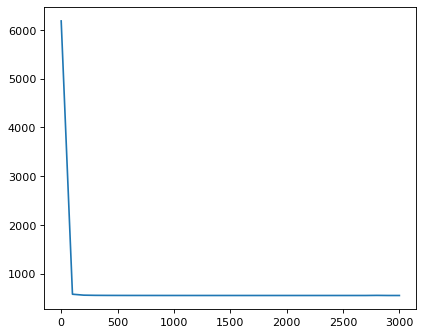

In [29]:
projections, losses = obj1.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [30]:
df_nn = obj1.nn_output(projections)
df_nn.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
ZFP36L2_PLEKHH2,"(787, 1511)",0.000001,1,118.412938
EMB_COL1A1,"(988, 2985)",0.000002,2,195.427587
GPR171_ADIRF,"(2084, 2859)",0.000002,3,144.401301
GADD45G_TNC,"(1305, 2881)",0.000002,4,182.625271
RGS16_AQP1,"(1544, 2170)",0.000002,5,118.099664


In [31]:
#df_nn_to_output = df_nn.iloc[:1000, :]
#df_nn_to_output.to_csv('distances_nn.csv')

[[ 1.         -0.18006849]
 [-0.18006849  1.        ]]


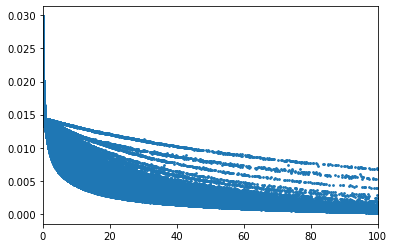

In [32]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [33]:
# df_nn_filtered = df_nn.loc[candidates]
# len(df_nn_filtered)

In [34]:
df_nn_filtered = obj1.filtered_nn_output(df_nn, candidates)
df_nn_filtered.head()

manifold aligned # of L-R pairs: 267


,idx,dist,rank,correspondence_score,rank_filtered
TNF_VCAM1,"(2815, 1458)",0.000139,2901,105.868986,1
AREG_PDGFRB,"(2807, 1681)",0.000935,19789,58.268225,2
TNF_PTPRS,"(2815, 1346)",0.001259,25504,47.985439,3
CSF2_CDH11,"(2928, 789)",0.001316,26378,108.224469,4
IL13_CXCL12,"(2869, 2919)",0.001346,26846,823.727490,5


In [35]:
df_enriched = obj1.chi2_test(df_nn, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched


Total enriched: 8 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
TNF_VCAM1,"(2815, 1458)",0.000139,2901,105.868986,0.000141,1
AREG_PDGFRB,"(2807, 1681)",0.000935,19789,58.268225,0.006237,2
TNF_PTPRS,"(2815, 1346)",0.001259,25504,47.985439,0.011807,3
CSF2_CDH11,"(2928, 789)",0.001316,26378,108.224469,0.013040,4
IL13_CXCL12,"(2869, 2919)",0.001346,26846,823.727490,0.013700,5
CD40LG_C3,"(2679, 2880)",0.001755,32011,96.296086,0.025464,6
TNF_CDH11,"(2815, 789)",0.002219,37451,31.484661,0.043968,7
AREG_NTRK2,"(2807, 57)",0.002315,38598,26.159519,0.048452,8


## NL:

In [17]:
# obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
           pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

print(obj2)

init an Xct object for interactions from Inflam. FIB (69) to Inflam. TC (44)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. FIB X Inflam. TC = 69 X 44
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [26]:
# obj2 = Xct(ada2, 'Inflam. TC', 'Inflam. FIB', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_TC2FIB_NL', mode = 'full', verbose = True)

obj2 = Xct(ada2, 'Inflam. TC', 'Inflam. FIB', build_GRN = False,
           pcNet_name = 'net_TC2FIB_NL', mode = 'full', verbose = True)

print(obj2)

init an Xct object for interactions from Inflam. TC (44) to Inflam. FIB (69)...
building GRN...
GRN of Cell A has been built, start building GRN of Cell B...
GRN of Cell B has been built, building correspondence..
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. TC X Inflam. FIB = 44 X 69
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [36]:
df2 = obj2.fill_metric()
df2

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
28,AREG,NTRK2,0.110786,0.249578,0.259646,0.572404,2.343666,2.293491,4.599436,3.031417,-0.063496,0.122427
387,CD48,CD2,0.408150,0.048770,0.957750,0.101000,2.346566,2.070950,2.397765,6.516407,0.015488,-0.030731
403,AREG,PDGFRB,0.110786,0.592975,0.259646,1.119884,2.343666,1.888586,4.599436,1.784639,-0.063496,-0.014787
506,HLA-B,CD3G,3.308363,0.023015,1.776630,0.036019,0.537012,1.565012,0.402889,8.246211,-0.145559,-0.292288
640,AREG,IGF1R,0.110786,0.052660,0.259646,0.095815,2.343666,1.819507,4.599436,5.878102,-0.063496,-0.153715
805,COL6A3,SDC3,0.125175,0.115588,0.226994,0.283821,1.813412,2.455454,3.806180,4.609030,-0.153819,0.099627
1064,L1CAM,CNTN1,0.065409,0.151068,0.183968,0.508019,2.812582,3.362843,6.557439,4.718095,0.022037,0.231330
1703,L1CAM,EZR,0.065409,0.124564,0.183968,0.246485,2.812582,1.978775,6.557439,3.985671,0.022037,0.029876
1707,IFNG,MUC1,0.045363,0.059148,0.088485,0.124096,1.950602,2.098079,6.557439,5.955829,-0.187946,-0.052102
1708,TNF,MUC1,0.830820,0.059148,2.253961,0.124096,2.712937,2.098079,1.807034,5.955829,0.358806,-0.052102


In [37]:
#selected LR pairs
candidates2 = obj2._candidates(df2)
print(len(candidates2))
candidates2[:5]

39


['AREG_NTRK2', 'CD48_CD2', 'AREG_PDGFRB', 'HLA-B_CD3G', 'AREG_IGF1R']

Net(
  (linear1): Linear(in_features=44, out_features=36, bias=True)
  (linear2): Linear(in_features=36, out_features=9, bias=True)
  (linear3): Linear(in_features=9, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=69, out_features=44, bias=True)
  (linear2): Linear(in_features=44, out_features=11, bias=True)
  (linear3): Linear(in_features=11, out_features=2, bias=True)
)
0 7582.83251953125
99 840.112060546875
199 688.987548828125
299 650.4308471679688
399 634.2970581054688
499 626.474609375
599 622.16796875
699 619.5413818359375
799 617.8359375
899 616.6689453125
999 615.8594360351562
1099 615.29248046875
1199 614.8762817382812
1299 614.567138671875
1399 614.3521728515625
1499 614.1763916015625
1599 614.0466918945312
1699 613.94580078125
1799 613.8531494140625
1899 613.7817993164062
1999 613.7322998046875
2099 613.66259765625
2199 613.6767578125
2299 613.574951171875
2399 613.6547241210938
2499 613.510009765625
2599 613.4976196289062
2699 613.448486328125
2799 613.4

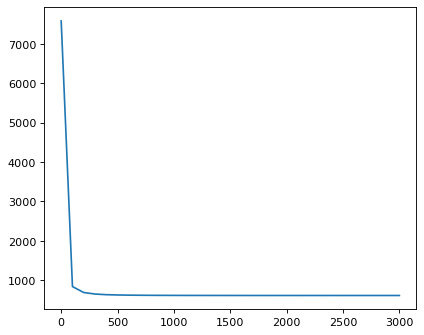

In [38]:
projections2, losses2 = obj2.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [39]:
df_nn2 = obj2.nn_output(projections2)
df_nn2.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
NSUN6_MT1X,"(1377, 2093)",9.954997e-07,1,139.557709
IL2RA_LTBP4,"(2079, 1000)",4.027887e-06,2,109.948649
NSUN6_MT2A,"(1377, 1679)",4.714559e-06,3,139.443405
RGS16_TNC,"(658, 2447)",5.543689e-06,4,107.359229
ANKRD36C_SFRP2,"(2129, 2451)",5.628593e-06,5,153.559652


[[ 1.         -0.20548029]
 [-0.20548029  1.        ]]


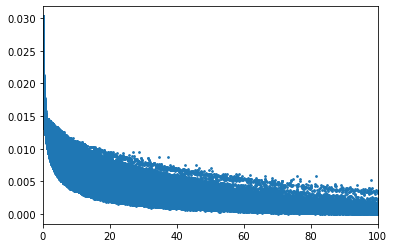

In [40]:
#check corr
select = df_nn2['correspondence_score'] != 0
nX = np.asarray(df_nn2['correspondence_score'][select])
nY = np.asarray(df_nn2['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [41]:
df_enriched2 = obj2.chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates2)

df_enriched2


Total enriched: 4 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
CD40LG_C3,"(2624, 2403)",0.000058,469,190.471617,0.000063,1
IL13_CXCL12,"(2768, 2726)",0.000776,14917,337.523126,0.004812,2
TNF_PTPRS,"(2932, 1717)",0.002127,37560,55.093103,0.039213,3
TNF_INSR,"(2932, 953)",0.002310,40454,44.094921,0.046645,4
